# Test Notebook for Model 3

In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 
import os
emotions_list = ['Affection', 'Anger', 'Annoyance','Anticipation', 'Aversion',
                'Confidence', 'Disapproval', 'Disconnection', 'Disquietment', 
                'Doubt/Confusion', 'Embarrassment', 'Engagement', 'Esteem', 
                'Excitement', 'Fatigue', 'Fear', 'Happiness','Pain', 'Peace',
                'Pleasure','Sadness', 'Sensitivity', 'Suffering', 'Surprise',
                'Sympathy', 'Yearning', 'Disgust', 'Neutral']

# load test set and labels
X_test = np.load('datasets/test_data.npy')
t_test = np.load('datasets/test_labels.npy')

X_test.shape, t_test.shape

((10493, 48, 48, 3), (10493,))

In [15]:
#X_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

In [16]:
import joblib 

model3 = joblib.load('models/Model3_trained_updated.pkl');

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-15 03:51:36        13226
metadata.json                                  2023-04-15 03:51:36           64
variables.h5                                   2023-04-15 03:51:36     39275128
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_5
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_6
......vars
.........0
.........1


In [17]:
accuracy_test = model3.evaluate(X_test, t_test)

328/328 [==============================] - 50s 151ms/step - loss: 1.6545 - accuracy: 0.4942


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
y_test = np.argmax(model3.predict(X_test), axis=1)

328/328 [==============================] - 63s 191ms/step


TypeError: unsupported operand type(s) for +: 'int' and 'str'

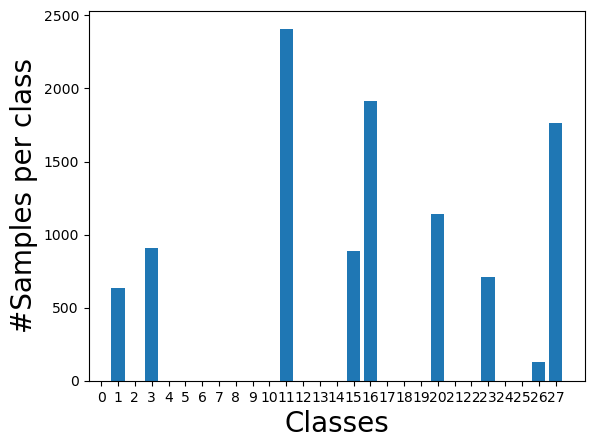

In [20]:
vals, counts = np.unique(y_test, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(28), range(28))
plt.xlabel('Classes',size=20)
plt.ylabel('#Samples per class', size=20)
plt.title('Test Data (Total = '+str(X_test.shape[1]+' samples)', size=15));

In [21]:
np.unique(y_test)

array([ 1,  3,  5, 11, 15, 16, 20, 23, 26, 27], dtype=int64)

In [29]:
#print(classification_report(t_test, y_test, target_names=emotions_list))

print(classification_report(t_test, y_test,labels=np.arange(0,len(emotions_list),1),
                            target_names=emotions_list, digits=4,zero_division=0))

                 precision    recall  f1-score   support

      Affection     0.0000    0.0000    0.0000       661
          Anger     0.6003    0.3609    0.4508      1053
      Annoyance     0.0000    0.0000    0.0000       203
   Anticipation     0.8464    0.3491    0.4944      2194
       Aversion     0.0000    0.0000    0.0000        11
     Confidence     0.0000    0.0000    0.0000        72
    Disapproval     0.0000    0.0000    0.0000        12
  Disconnection     0.0000    0.0000    0.0000        30
   Disquietment     0.0000    0.0000    0.0000         6
Doubt/Confusion     0.0000    0.0000    0.0000         5
  Embarrassment     0.0000    0.0000    0.0000         1
     Engagement     0.0087    0.9545    0.0173        22
         Esteem     0.0000    0.0000    0.0000         1
     Excitement     0.0000    0.0000    0.0000         1
        Fatigue     0.0000    0.0000    0.0000         1
           Fear     0.4501    0.3916    0.4188      1024
      Happiness     0.7976    

In [41]:
# Set directories 
#img_dir = "imgs2/"
#num_imgs = len([name for name in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, name))])
#imgs = []
#for image in os.listdir(img_dir):
#    img = cv2.imread(os.path.join(img_dir, image))
#    arr = cv2.resize(img, (48, 48), interpolation=cv2.INTER_CUBIC)
    
#    imgs.append(arr)
#imgs = np.array(imgs).reshape(-1, 48, 48, 3)
#imgs.shape

(5388, 48, 48, 3)

In [9]:
#imgs_rs = tf.keras.applications.mobilenet_v2.preprocess_input(imgs)
#imgs_rs.shape

(141, 48, 48, 3)

In [42]:
#y_imgs = np.argmax(model3.predict(imgs), axis=1)

169/169 [==============================] - 35s 206ms/step


TypeError: unsupported operand type(s) for +: 'int' and 'str'

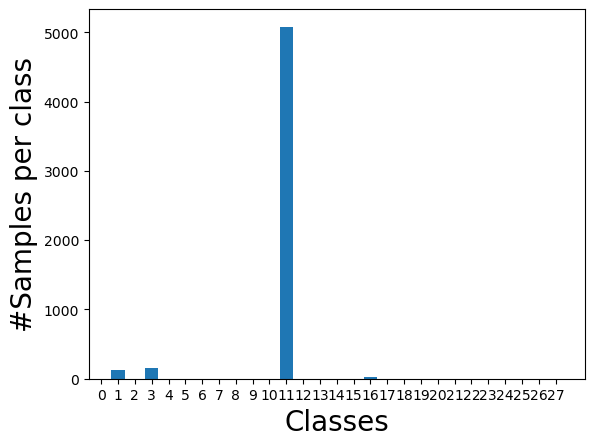

In [43]:
#vals, counts = np.unique(y_imgs, return_counts=True)

#plt.bar(vals, counts)
#plt.xticks(range(28), range(28))
#plt.xlabel('Classes',size=20)
#plt.ylabel('#Samples per class', size=20)
#plt.title('Training Data (Total = '+str(X_test.shape[1]+' samples)', size=15));

In [ ]:
#emo_predictions = []
#for i in range(len(imgs)):
#    print("item: ", i, y_imgs[i])
    #plt.imshow(imgs[i])

In [ ]:
#for image in os.listdir(img_dir):
#    img = cv2.imread(os.path.join(img_dir, image))
#    plt.imshow(img)